**Problem Statement 3 – Machine Learning**           

My task is to help John from STA IT services to create a linear regression model in Python or R to predict the CTC/Salary of new hires from the data provided.




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_excel("/content/Data_file.xlsx",header=2)


In [8]:
df.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [9]:
df.shape

(1338, 9)

we have 1338 rows and 9 columns


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1338 non-null   int64  
 1   College               1338 non-null   object 
 2   Role                  1338 non-null   object 
 3   City type             1338 non-null   object 
 4   Previous CTC          1338 non-null   int64  
 5   Previous job changes  1338 non-null   int64  
 6   Graduation marks      1338 non-null   int64  
 7   Exp (Months)          1338 non-null   int64  
 8   CTC                   1338 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 94.2+ KB


In [11]:
del df["S.No."]

In [12]:
df.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


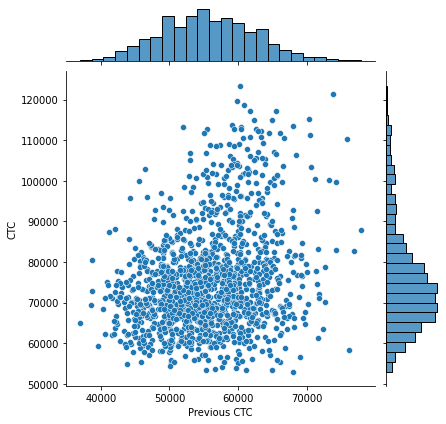

In [13]:
sns.jointplot(x="Previous CTC",y="CTC",data=df)

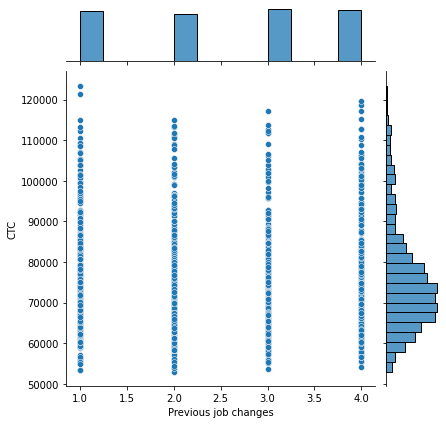

In [14]:
sns.jointplot(x="Previous job changes",y="CTC",data=df)

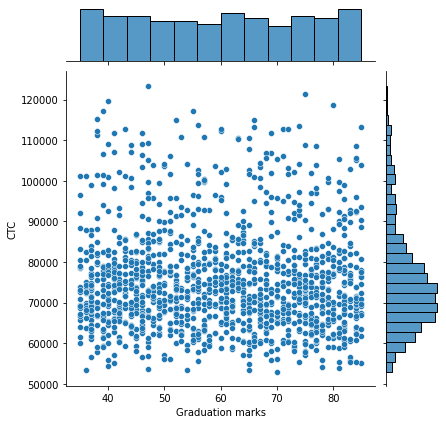

In [15]:
sns.jointplot(x="Graduation marks",y="CTC",data=df)

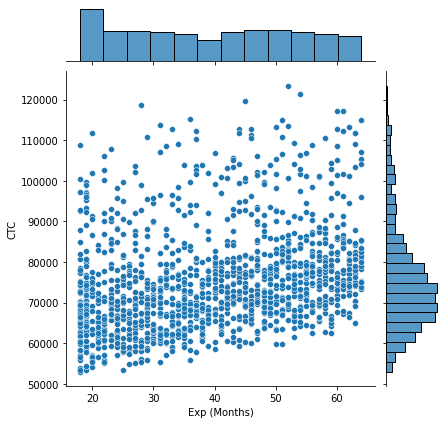

In [16]:
sns.jointplot(x="Exp (Months)",y="CTC",data=df)

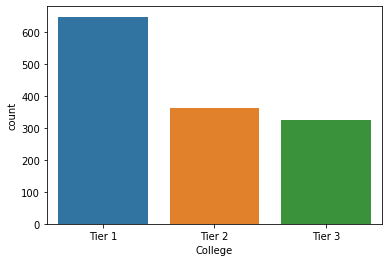

In [17]:
sns.countplot(x='College',data=df)

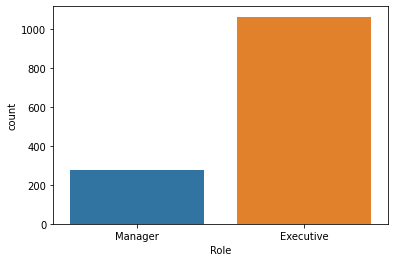

In [18]:
sns.countplot(x='Role',data=df)

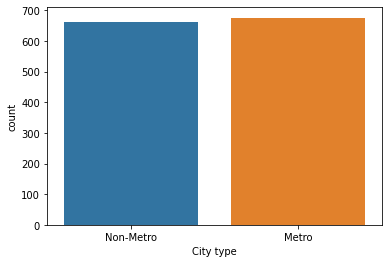

In [19]:
sns.countplot(x='City type',data=df)

Changing categorical data to dummy variables

In [20]:
df = pd.get_dummies(df,drop_first=True)

In [21]:
df.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1
1,57081,1,84,18,68005.870631,1,0,0,0
2,60347,2,52,28,76764.020277,1,0,0,0
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0


In [22]:
df.corr()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
Previous CTC,1.000000,0.008282,-0.037170,0.117035,0.270260,0.232138,-0.135957,0.021208,-0.036956
Previous job changes,0.008282,1.000000,0.001507,0.034137,0.007518,0.008599,-0.052387,-0.013131,0.001568
Graduation marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557,0.010571,-0.029326,0.014541,-0.018550
Exp (Months),0.117035,0.034137,-0.065412,1.000000,0.301569,-0.011642,-0.000407,-0.025019,0.020856
CTC,0.270260,0.007518,-0.017557,0.301569,1.000000,-0.041814,-0.149194,0.625435,-0.211258
College_Tier 2,0.232138,0.008599,0.010571,-0.011642,-0.041814,1.000000,-0.346265,0.068498,-0.017117
College_Tier 3,-0.135957,-0.052387,-0.029326,-0.000407,-0.149194,-0.346265,1.000000,-0.036945,0.011156
Role_Manager,0.021208,-0.013131,0.014541,-0.025019,0.625435,0.068498,-0.036945,1.000000,-0.076185
City type_Non-Metro,-0.036956,0.001568,-0.018550,0.020856,-0.211258,-0.017117,0.011156,-0.076185,1.000000


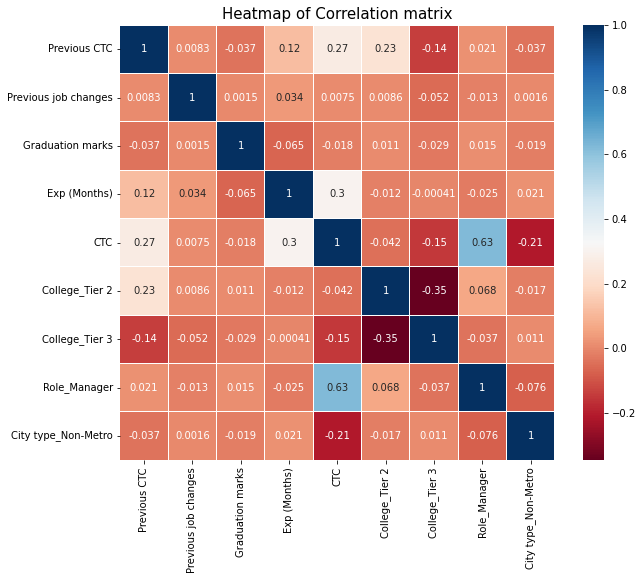

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,8))
plt.title('Heatmap of Correlation matrix', size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

CREATING REGRESSSION MODEL

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
X_train=df.drop('CTC',axis=1)
y_train=df['CTC']

In [28]:
X_train.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,0,0,1,1
1,57081,1,84,18,1,0,0,0
2,60347,2,52,28,1,0,0,0
3,49010,2,81,33,0,1,0,0
4,57879,4,74,32,0,1,0,0


In [29]:
y_train.head()

0    71406.576531
1    68005.870631
2    76764.020277
3    82092.386880
4    73878.097729
Name: CTC, dtype: float64

In [30]:
linearReg=LinearRegression()
linearReg.fit(X_train,y_train)

LinearRegression()

In [31]:
df_2=pd.read_excel("/content/Test_data_file.xlsx",header=0)

In [32]:
df_2.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_test=df_2.iloc[:,:12]

In [34]:
df_test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729


In [35]:
df_test=df_test[['College','Role','City type','previous CTC','previous job changes','Graduation marks','Exp','Actual CTC']]

In [36]:
df_test.head()

,College,Role,City type,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [37]:
df_test=pd.get_dummies(df_test,drop_first=True)

In [38]:
df_test.head()

,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1
1,57081,1,84,18,68005.870631,1,0,0,0
2,60347,2,52,28,76764.020277,1,0,0,0
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0


In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   previous CTC          1338 non-null   int64  
 1   previous job changes  1338 non-null   int64  
 2   Graduation marks      1338 non-null   int64  
 3   Exp                   1338 non-null   int64  
 4   Actual CTC            1338 non-null   float64
 5   College_Tier 2        1338 non-null   uint8  
 6   College_Tier 3        1338 non-null   uint8  
 7   Role_Manager          1338 non-null   uint8  
 8   City type_Non-Metro   1338 non-null   uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 57.6 KB


In [40]:
df.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1
1,57081,1,84,18,68005.870631,1,0,0,0
2,60347,2,52,28,76764.020277,1,0,0,0
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0


In [42]:
X_test=df_test.drop('Actual CTC',axis=1)
y_test=df_test['Actual CTC']

In [43]:
X_test.head()

,previous CTC,previous job changes,Graduation marks,Exp,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,0,0,1,1
1,57081,1,84,18,1,0,0,0
2,60347,2,52,28,1,0,0,0
3,49010,2,81,33,0,1,0,0
4,57879,4,74,32,0,1,0,0


In [44]:
from sklearn.metrics import r2_score,mean_squared_error as mse

In [46]:
r2_score(y_test,linearReg.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Exp
- previous CTC
- previous job changes
Feature names seen at fit time, yet now missing:
- Exp (Months)
- Previous CTC
- Previous job changes

  warnings.warn(message, FutureWarning)


0.6081873160506195

In [47]:
mse(y_test,linearReg.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Exp
- previous CTC
- previous job changes
Feature names seen at fit time, yet now missing:
- Exp (Months)
- Previous CTC
- Previous job changes

  warnings.warn(message, FutureWarning)


61677937.04530962